# __DTSC 5301 - Final Project Report - Clean Energy__
### By: Daniel Knopp, Peter LeCavalier, Ryan Hensel, Kenzie Hensel, Sierra Rose

**Introduction**
<div class="alert alert-block alert-info">
In this report, we set out to explore the potential future of clean energy in the U.S. Many Americans would like to see a full transition over to clean energy sources in the coming years. In hopes of the future of this transition, we looked at the trend of clean energy production in comparison to total energy consumption to see what year they might finally overlap. For this report, we defined clean energy to include solar, wind, hydroelectric, geothermal, and nuclear energy.
</div>

**Question of Interest**
<div class="alert alert-block alert-info">
Will clean energy production ever match total energy consumption within the U.S.?
</div>

**Data Source**
<div class="alert alert-block alert-info">
Our data comes from the U.S. Energy Information Administration (EIA). The EIA is an independent statistics and analysis group who “collects, analyzes, and disseminates independent and impartial energy information to promote sound policymaking, efficient markets, and public understanding of energy and its interaction with the economy and the environment” (EIA). They collect various data from all types of energy sources. We utilized their “Total Energy” source that provides data and projections across all energy types. Specifically, we looked at both the annual primary energy production by source and the annual primary energy consumption by source found under EIA’s Total Energy, Energy Overview. 
The annual primary energy production by source dataset provides us with the amount of energy produced in quadrillion btu from each energy source annually from the year 1949 to the year 2022 in the U.S. Originally, this data set included many sources of energy, both clean and unclean. Within this dataset, we extracted only the sources we defined as clean energy; solar, wind, hydroelectric, geothermal, and nuclear energy. Extracting only the values of what we deemed clean energy allows us sum all the sources and look at how production has changed each year for clean energy as a whole.
<br>
<ul>
    <li> Source 1: U.S. Energy Information Administration. (2023, September). TABLE 1.2 PRIMARY ENERGY PRODUCTION BY SOURCE. Retrieved September 20, 2023 from https://www.eia.gov/totalenergy/data/browser/?tbl=T01.02#/?f=M.
</ul>

The annual primary energy consumption by source dataset provides us with the amount of energy consumed in quadrillion btu from each energy source annually from the year 1949 to the year 2022 in the U.S. From this dataset, we utilized the consumption of total primary energy (an already computed total) to look at how much energy is consumed annually across all energy sources.
<ul>
    <li> Source 2: U.S. Energy Information Administration. (2023, September). TABLE 1.3 PRIMARY ENERGY CONSUMPTION BY SOURCE. Retrieved September 20, 2023 from https://www.eia.gov/totalenergy/data/browser/?tbl=T01.03#/?f=M.
</ul>
</div>

**Possible Sources of Bias**
<div class="alert alert-block alert-info">
Bias at the reporting level:
<br>
<ul>
    <li> Reporting agencies (for instance, direct energy producers themselves) may report incorrect or skewed data to the EIA. We noticed in the data that total reporting of energy was slightly different than individual data types (for instance, combined coal + nuclear was different from adding up coal + nuclear).
</ul>
Personal emotional bias:
<br>
<ul>
    <li> Since this is an outcome that we are hopeful will happen sooner rather than later, our bias could affect the functions we chose for analysis.
</ul>
Selection bias:
<br>
<ul>
    <li> We chose to include nuclear as clean energy while some may not consider nuclear to be “clean.”
</ul>

</div>

**CODE**
<div class="alert alert-block alert-info">
First, we need to import all the modules we will use.
</div>

In [26]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<div class="alert alert-block alert-info">
Next, we need to import the data.
</div>

In [27]:
# import annual energy production by source data
e_production_by_source = pd.read_csv('annual_e_prod_by_source.csv')

# import annual energy consumption by source data
e_consumption_by_source = pd.read_csv('annual_e_cons_by_source.csv')

<div class="alert alert-block alert-info">
Now that we have the data, we need to clean it and reformat it by removing all unclean energy from the production dataset.
</div>

In [28]:
# Create list of energy categorized as clean energy
clean_energy = ['Nuclear', 'Solar', 'Wind', 'Hydroelectric', 'Geothermal', 'Annual Total']

# Get the column names of the energy production by source dataframe and create a list of the columns names to keep
cols = e_production_by_source.columns
cols_to_keep = [col for col in cols for clean in clean_energy if clean in col]

# Create a new dataframe with only the clean energy columns
clean_energy = e_production_by_source[cols_to_keep]

# Change all Not Available to zero
clean_energy = clean_energy.replace('Not Available', 0)

# Cast all values to float
clean_energy = clean_energy.astype(float)

# Create a new column that sums all the clean energy sources
clean_energy['Total'] = clean_energy.sum(axis=1) - clean_energy['Annual Total']

# Create a new column that computes the clean energy percentage of total energy production
clean_energy['Clean_Percentage'] = clean_energy['Total'] / e_consumption_by_source['Total Primary Energy Consumption'] * 100


<div class="alert alert-block alert-info">
Now that the data is cleaned and reformatted, let's plot it to see how the trends look over time.
</div>

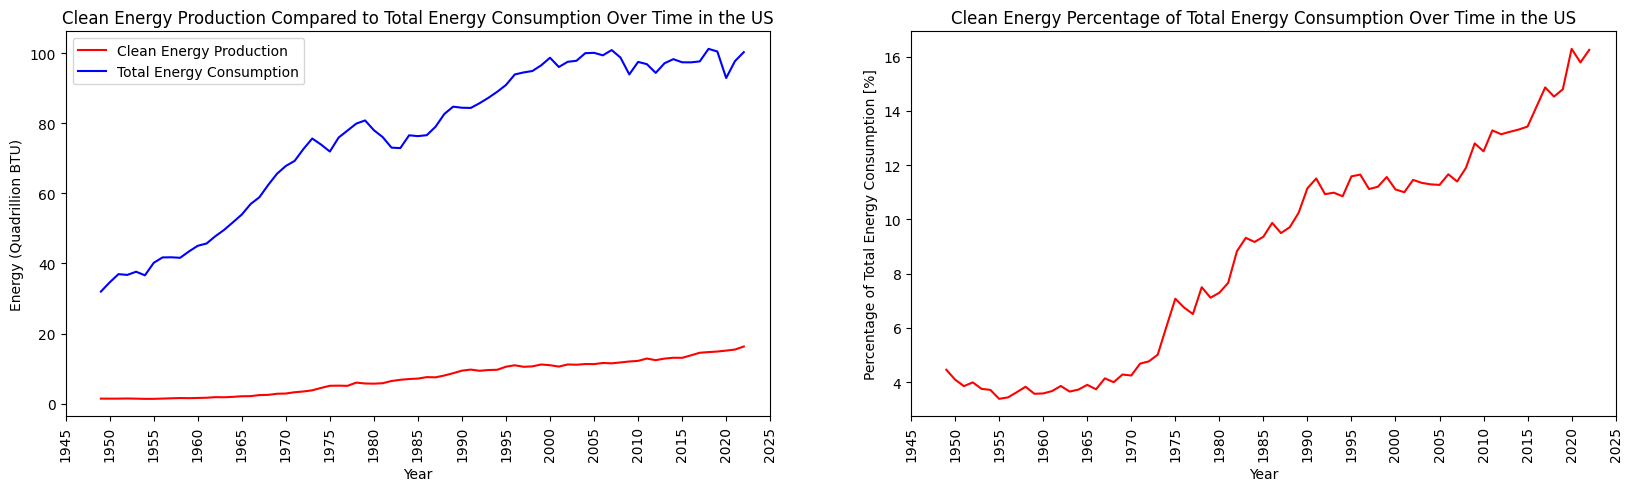

In [29]:

# Create a 1x2 subplot
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot the clean energy production and total energy consumption over time on first subplot
ax[0].plot(clean_energy['Annual Total'], clean_energy['Total'], color='r', label='Clean Energy Production')
ax[0].plot(e_consumption_by_source['Annual Total'], e_consumption_by_source['Total Primary Energy Consumption'], color='b', label='Total Energy Consumption')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Energy (Quadrillion BTU)')
ax[0].legend()
ax[0].set_xlim(1945, 2025)
ax[0].set_xticks(np.arange(1945, 2026, 5))
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Clean Energy Production Compared to Total Energy Consumption Over Time in the US')

# Plot clean energy production as a percentage of total energy consumption on second subplot
ax[1].plot(clean_energy['Annual Total'], clean_energy['Clean_Percentage'], color='r', label='Clean Energy Production')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Percentage of Total Energy Consumption [%]')
ax[1].set_xlim(1945, 2025)
ax[1].set_xticks(np.arange(1945, 2026, 5))
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Clean Energy Percentage of Total Energy Consumption Over Time in the US')

plt.show()

**Visualizations and Analyses 1 & 2 Discussion**
<div class="alert alert-block alert-info">
The first analysis we conducted was a comparison of clean energy production within the U.S. to total energy consumption within the U.S. Our data set ranged from 1949 to 2022. (shown on left subplot)
<br>
<br>
The second analysis compares clean energy as a percentage of total energy consumption. We discovered that clean energy only accounts for 16% of our total energy consumption in 2022, but has significantly increased since our data originated in 1949 - with significant spikes in clean energy consumption percentage in relation to total energy consumption around 1975 and 2010. (shown on right subplot)
</div>

<div class="alert alert-block alert-info">
Next, we will move on to creating models for predicting future trends.
</div>

**Assumptions For Total Energy Consumption Curve Fitting**
<div class="alert alert-block alert-info">
Based on the shape of the total energy consumption data in the plot above, we decided to use a special function for curve fitting this data called a hill sigmoid function. The reason we chose this is because the total energy consumption data initially takes on a quadratic- or exponential-like shape but then tapers off, seeming to approach a horizontal asymptote. This shape is exactly how a hill sigmoid function behaves, however, this choice does inherently assume that there will be some eventual maximum power which will ever be produced in the US as time goes on. While it is possible for a trend like this to occur in the near term, it seems unlikely to us to assume that no new breakthrough technologies in energy production will ever occur to allow for substantially higher energy production - meaning our confidence in the analysis we are making drops off significantly the further out our predictions are extrapolated.
</div>

In [30]:
# Define a Hill sigmoidal function to use for curve fitting later
def hill_sigmoid(x, a, b, c):
    return  a * np.power(x, b) / (np.power(c, b) + np.power(x, b)) 

**Assumptions for Clean Energy Production Curve Fitting**
<div class="alert alert-block alert-info">
Based on the shape of the clean energy production data in the plot above, we decided that either a quadratic or exponential function would produce a good curve fit. The choice between these in the end is a significant assumption becasue an exponential function will grow more quickly than a quadratic function.
</div>

In [31]:
# Define an exponential function to use for curve fitting later
def exponential(x, a, b, c):
    return a * b ** x + c

<div class="alert alert-block alert-info">
Finally, we need to create some trendlines so that we can extrapolate the data out into the future and determine what year (if ever) we predict that clean energy production will become equal to total energy consumption in the US.
</div>

In [32]:
# Create a list of years to forecast trendlines out to 2050
xmin = e_consumption_by_source['Annual Total'][0]
xmax = 2319
future_years = np.arange(xmin, xmax, 1)
future_years_mod = future_years - xmin
ticks = np.arange(xmin, xmax+1, round((xmax - xmin) / 10))

#### Total Energy Consumption ####

# First, set the origin of the data to the first data point (so curve fitting works better)
total_start_energy = e_consumption_by_source['Total Primary Energy Consumption'][0]
total_x_modified   = e_consumption_by_source['Annual Total'] - xmin
total_y_modified   = e_consumption_by_source['Total Primary Energy Consumption'] - total_start_energy

# Perform curve fitting using the logarithmic function defined earlier for total energy consumption
total_popt, total_pcov = curve_fit(hill_sigmoid, total_x_modified, total_y_modified, p0=[1, 1, 1])

# Store the values of the curve fit extrapolated out to the final date set above
total_val_predictive = hill_sigmoid(future_years_mod, *total_popt) + total_start_energy

# Compute the R^2 value of the curve fit
total_r_squared = np.corrcoef(total_y_modified, hill_sigmoid(total_x_modified, *total_popt))[0, 1] ** 2

#### Clean Energy Production ####

# First, set the origin of the data to the first data point (so curve fitting works better)
clean_start_energy = clean_energy['Total'][0]
clean_x_modified   = clean_energy['Annual Total'] - xmin
clean_y_modified   = clean_energy['Total'] - clean_start_energy

# Perform curve fitting using the exponential function defined earlier for clean energy production
clean_exp_popt, clean_exp_pcov = curve_fit(exponential, clean_x_modified, clean_y_modified, p0=[1, 1, 1], maxfev=3000)

# Store the values of the curve fit extrapolated out to the final date set above
clean_exp_val_predictive = exponential(future_years_mod, *clean_exp_popt) + clean_start_energy

# Compute the R^2 value of the curve fit
clean_exp_r_squared = np.corrcoef(clean_y_modified, exponential(clean_x_modified, *clean_exp_popt))[0, 1] ** 2

# Create a trendline for the clean energy data as a quadratic polynomial and store the R^2 value
clean_quad_fit            = np.polyfit(clean_energy['Annual Total'], clean_energy['Total'], 2)
clean_quad_r_squared      = np.corrcoef(clean_energy['Annual Total'], np.polyval(clean_quad_fit, clean_energy['Annual Total']))[0, 1] ** 2
clean_quad_val_predictive = np.polyval(clean_quad_fit, future_years)

# Create a trendline for the clean energy perentage as a polynomial and store the R^2 value
clean_perc_quad_fit            = np.polyfit(clean_energy['Annual Total'], clean_energy['Clean_Percentage'], 2)
clean_perc_quad_r_squared      = np.corrcoef(clean_energy['Annual Total'], np.polyval(clean_perc_quad_fit, clean_energy['Annual Total']))[0, 1] ** 2
clean_perc_quad_val_predictive = np.polyval(clean_perc_quad_fit, future_years)

# Perform curve fitting using the exponential function defined earlier for clean energy percentage
clean_perc_exp_popt, clean_perc_exp_pcov = curve_fit(exponential, clean_x_modified, clean_energy['Clean_Percentage'], p0=[1, 1, 1], maxfev=3000)

# Store the values of the curve fit extrapolated out to the final date set above
clean_perc_exp_val_predictive = exponential(future_years_mod, *clean_perc_exp_popt)

# Compute the R^2 value of the curve fit
clean_perc_exp_r_squared = np.corrcoef(clean_energy['Clean_Percentage'], exponential(clean_x_modified, *clean_perc_exp_popt))[0, 1] ** 2

<div class="alert alert-block alert-info">
Now that we have our trendlines fitted, let's plot the data to show our future predicitons. We can also compute the predicted years where we meet the question of interest criteria for each analysis method and display the years on the plot.
</div>

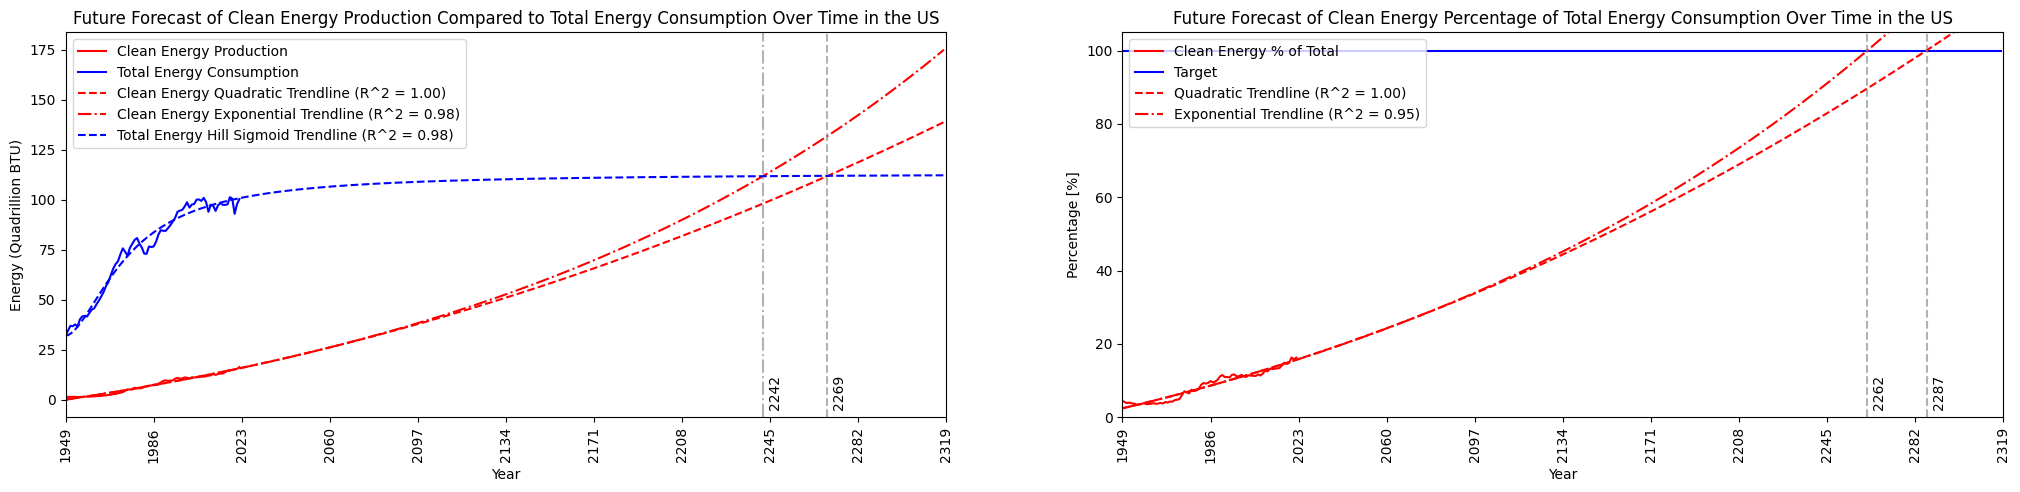

In [33]:
#### Left Plot ####

# Create a 1x2 subplot
fig2, ax2 = plt.subplots(1, 2, figsize=(25, 5))

# Plot the trendlines
ax2[0].plot(clean_energy['Annual Total'], clean_energy['Total'], color='r', label='Clean Energy Production')
ax2[0].plot(e_consumption_by_source['Annual Total'], e_consumption_by_source['Total Primary Energy Consumption'], color='b', label='Total Energy Consumption')
ax2[0].plot(future_years, clean_quad_val_predictive, color='r', linestyle='--', label=f'Clean Energy Quadratic Trendline (R^2 = {clean_quad_r_squared:.2f})')
ax2[0].plot(future_years, clean_exp_val_predictive, color='r', linestyle='-.', label=f'Clean Energy Exponential Trendline (R^2 = {clean_exp_r_squared:.2f})')
ax2[0].plot(future_years, total_val_predictive, color='b', linestyle='--', label=f'Total Energy Hill Sigmoid Trendline (R^2 = {total_r_squared:.2f})')
ax2[0].set_xlabel('Year')
ax2[0].set_ylabel('Energy (Quadrillion BTU)')
ax2[0].legend()
ax2[0].set_xlim(xmin, xmax)
ax2[0].set_xticks(ticks)
ax2[0].tick_params(axis='x', rotation=90)
ax2[0].set_title('Future Forecast of Clean Energy Production Compared to Total Energy Consumption Over Time in the US')

# Get the closest point between quadratic clean energy trendline and total energy consumption trendline and return the year they cross
closest_val_quad = min(abs(total_val_predictive - clean_quad_val_predictive))
cross_year_quad  = future_years[abs(total_val_predictive - clean_quad_val_predictive) == closest_val_quad][0]

# Get the closest point between exponential clean energy trendline and total energy consumption trendline and return the year they cross
closest_val_exp = min(abs(total_val_predictive - clean_exp_val_predictive))
cross_year_exp  = future_years[abs(total_val_predictive - clean_exp_val_predictive) == closest_val_exp][0]

# Add a dotted vertial grey line at the year the trendlines cross with 0.6 transparency
ax2[0].axvline(x=cross_year_quad, color='grey', linestyle='--', alpha=0.6)
ax2[0].axvline(x=cross_year_exp , color='grey', linestyle='-.', alpha=0.6)

# Add the crossing year as text on the plot positioned next to the vertical line
ax2[0].text(cross_year_quad + 2, -5, f'{cross_year_quad:.0f}', rotation=90, verticalalignment='bottom', horizontalalignment='left')
ax2[0].text(cross_year_exp + 2, -5, f'{cross_year_exp:.0f}', rotation=90, verticalalignment='bottom', horizontalalignment='left')

#### Right Plot ####

# Plot the clean energy production as a percentage of total energy consumption trendline
ax2[1].plot(clean_energy['Annual Total'], clean_energy['Clean_Percentage'], color='r', label='Clean Energy % of Total')
ax2[1].plot(future_years, np.full(len(future_years), 100), color='b', linestyle='-', label=f'Target')
ax2[1].plot(future_years, clean_perc_quad_val_predictive, color='r', linestyle='--', label=f'Quadratic Trendline (R^2 = {clean_perc_quad_r_squared:.2f})')
ax2[1].plot(future_years, clean_perc_exp_val_predictive , color='r', linestyle='-.', label=f'Exponential Trendline (R^2 = {clean_perc_exp_r_squared:.2f})')
ax2[1].set_xlabel('Year')
ax2[1].set_ylabel('Percentage [%]')
ax2[1].legend(loc='upper left')
ax2[1].set_xlim(xmin, xmax)
ax2[1].set_ylim(0, 105)
ax2[1].set_xticks(ticks)
ax2[1].tick_params(axis='x', rotation=90)
ax2[1].set_title('Future Forecast of Clean Energy Percentage of Total Energy Consumption Over Time in the US')

# Get the year when quadratic clean energy production trendline is 100% of total energy consumption
perc_closest_val_quad = min(abs(100 - clean_perc_quad_val_predictive))
perc_clean_100_quad   = future_years[abs(100 - clean_perc_quad_val_predictive) == perc_closest_val_quad][0]

# Get the year when exponential clean energy production trendline is 100% of total energy consumption
perc_closest_val_exp = min(abs(100 - clean_perc_exp_val_predictive))
perc_clean_100_exp   = future_years[abs(100 - clean_perc_exp_val_predictive) == perc_closest_val_exp][0]

# Add a dotted vertial grey line at the year when clean energy production is 100% of total energy consumption with 0.6 transparency for both trendlines
ax2[1].axvline(x=perc_clean_100_quad, color='grey', linestyle='--', alpha=0.6)
ax2[1].axvline(x=perc_clean_100_exp , color='grey', linestyle='--', alpha=0.6)

# Add the crossing year as text on the plot positioned next to the vertical line
ax2[1].text(perc_clean_100_quad + 2, 2, f'{perc_clean_100_quad:.0f}', rotation=90, verticalalignment='bottom', horizontalalignment='left')
ax2[1].text(perc_clean_100_exp  + 2, 2, f'{perc_clean_100_exp :.0f}', rotation=90, verticalalignment='bottom', horizontalalignment='left')

plt.show()

**Visualizations and Analyses 3 & 4 Discussion**
<div class="alert alert-block alert-info">
The third analysis we conducted was predicting when clean energy production would match total energy consumption within the U.S.  The models we created used a hill sigmoid function to predict total growth in energy consumption and a quadratic function & exponential function to predict clean energy production. The intersection of the hill sigmoid and quadratic functions is the year 2269 and the intersection of the hill sigmoid and exponential functions is the year 2242. These intersections answer our question of when clean energy production will match total energy consumption within the U.S. (left subplot)
<br>
<br>
The fourth analysis we conducted utilized another method to predict when clean energy production would match total energy consumption within the U.S. This method utilized the clean energy percentage to total energy consumption data computed earlier, and forecasted when clean energy percentage would be 100% of total energy consumption, using a quadratic fit and exponential fit. This resulted in clean energy being 100% of our energy consumption by the year 2287 using the quadratic fit and 2262 using the exponential fit.
<br>
<br>
The differences between analysis 3 and analysis 4 can be accounted for by the methodologies used to predict the date.  However, due to how close these dates are, the difference of 18 years for the quadratic fits and 20 years for the exponential fits over a 268-year prediction gives credence to the robustness of our analysis. 
<br>
<br>
While our analyses give definitive numbers for predicted years of matched clean energy production and consumption, these should not be taken as pure truth. If the raw data shows anything, it shows that consumption and production of energy are very unpredictable in the US. It is a complex issue and has many sociopolitical factors that can’t be perfectly understood or predicted with statistical analysis. Depending on policy changes, government spending, corporation influence, and new technology developments, these numbers could be extremely skewed in the positive or negative directions at a sudden rate.
</div>

**Conclusion**
<div class="alert alert-block alert-info">
From the analyses we performed, our group discovered that clean energy has the potential to outpace total energy consumption within the U.S. The assumptions that we made in order to perform our analyses include: using the hill sigmoid function to predict total energy consumption in the future, quadratic and exponential functions to predict clean energy production in the future, and that all of the clean energy produced is consumed within the US. While these functions do not account for advancements in technology for these sources of energy, we were able to use them to see if this would be possible at their current rate and if so, when. Without significant advancements in technology or a drastic legislative and culture shift into clean energy, we will not see significant progress within our lifetimes. 
</div>